Mean Daily Return: 0.000647
Standard Deviation: 0.027706
Top 5 Days (Highest Positive Returns) Indices: [ 11  52 742  49  92]
Top 5 Days (Highest Negative Returns) Indices: [ 12 584 678  41 173]


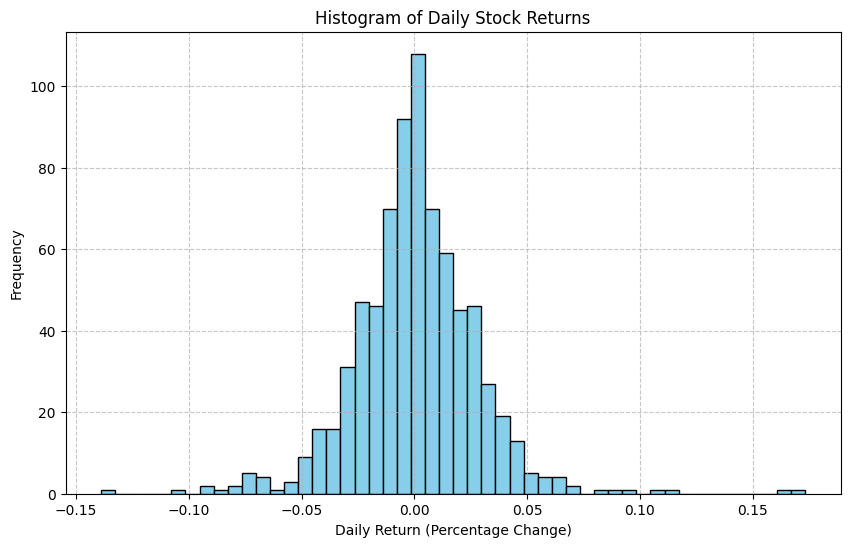

In [1]:
import numpy as np  # 'import' loads the library. 'numpy' is for math/arrays. 'as np' is a shortcut nickname.
import matplotlib.pyplot as plt  # 'matplotlib.pyplot' is the tool for charts. 'as plt' is its nickname.

# 1. Load the dataset into a NumPy array
# 'file_path' is a variable holding the name of our data file.
file_path = 'stock_prices.csv'

# 'np.genfromtxt' reads text files.
# 'delimiter' tells it that columns are separated by commas.
# 'skip_header=1' ignores the first row (the column titles) so we only get numbers.
# 'usecols=1' tells it to grab the second column (Index 1), which is the 'Close' price.
# 'converters' is a dictionary used to clean data on the fly.
# 'lambda s' is a quick function where 's' is the raw text. 
# 's.strip' removes the double quotes from the text, and 'float' converts it to a number.
# 'encoding' ensures the text is read using standard modern character formatting.
prices = np.genfromtxt(
    file_path, 
    delimiter=',', 
    skip_header=1, 
    usecols=1, 
    converters={1: lambda s: float(s.strip('"'))},
    encoding='utf-8'
)

# 2. Calculate the daily returns
# '[::-1]' is a slice that reverses the array. 
# The CSV is newest-to-oldest; we reverse it to be chronological (oldest-to-newest).
prices_chrono = prices[::-1]

# We calculate: (Price_today - Price_yesterday) / Price_yesterday.
# 'prices_chrono[1:]' selects all prices starting from the second day (Day 2 to End).
# 'prices_chrono[:-1]' selects all prices except the last one (Day 1 to Second-to-Last).
# This 'vectorized' math calculates the return for every single day in one step.
daily_returns = (prices_chrono[1:] - prices_chrono[:-1]) / prices_chrono[:-1]

# 3. Compute mean and standard deviation of daily returns
# 'np.mean' finds the average growth per day.
# 'np.std' finds the Standard Deviation (Volatility), showing how much the stock fluctuates.
mean_return = np.mean(daily_returns)
std_return = np.std(daily_returns)

# 'f"..."' is an f-string used to print variables inside text.
# ':.6f' formats the number to show 6 decimal places.
print(f"Mean Daily Return: {mean_return:.6f}")
print(f"Standard Deviation: {std_return:.6f}")

# 4. Identify the top 5 days with the highest positive and negative returns
# 'len(prices)' gets the total number of rows in our data.
N = len(prices)

# 'np.argsort' doesn't sort the numbers; it returns the 'indices' (positions) of the sorted values.
sorted_indices = np.argsort(daily_returns)

# '[:5]' takes the first five indices (the lowest/most negative returns).
top_5_neg_chrono_idx = sorted_indices[:5] 

# '[-5:]' takes the last five indices (the highest returns).
# '[::-1]' reverses them so the #1 best day is first.
top_5_pos_chrono_idx = sorted_indices[-5:][::-1]  

# Because we reversed the array and 'returns' has one less row than 'prices', 
# we use this math to find the exact row number in the original CSV file.
pos_indices_original = (N - 1) - (top_5_pos_chrono_idx + 1)
neg_indices_original = (N - 1) - (top_5_neg_chrono_idx + 1)

print(f"Top 5 Days (Highest Positive Returns) Indices: {pos_indices_original}")
print(f"Top 5 Days (Highest Negative Returns) Indices: {neg_indices_original}")

# 5. Plot the histogram of the daily returns
# 'plt.figure' sets the size of our drawing canvas (10 inches by 6 inches).
plt.figure(figsize=(10, 6))

# 'plt.hist' creates the histogram bars.
# 'bins=50' divides the data into 50 vertical bars to show the spread.
# 'color' sets the bar color, and 'edgecolor' draws a border around each bar.
plt.hist(daily_returns, bins=50, color='skyblue', edgecolor='black')

# 'title', 'xlabel', and 'ylabel' add labels to the chart so the audience understands it.
plt.title('Histogram of Daily Stock Returns')
plt.xlabel('Daily Return (Percentage Change)')
plt.ylabel('Frequency')

# 'plt.grid' adds a dashed background grid to make the bars easier to measure by eye.
plt.grid(True, linestyle='--', alpha=0.7)

# 'plt.savefig' saves the chart as an image file.
plt.savefig('daily_returns_histogram.png')

# 'plt.show' displays the final plot on the screen.
plt.show()